In [1]:
from unittest.mock import numerics

# biblioteca que facilita a analise de dados
import pandas as pd

#biblioteca com função matemáticas avançadas
import numpy as np

#biblioteca base para criar gráficos
import matplotlib.pyplot as plt

#biblioteca para criar gráficos mais elaborados
#cheio de fru-fru
import seaborn as sns

#1. inportar a base de dados para o jupyter
df_funcionarios = pd.read_csv('RecursosHumanos.csv')

#2. verificar a importação do dataset
#Use head -  para os 5 primeiros e tail para os 5 ultimos
display(df_funcionarios.head())

# 3. ver o formato da tabela
print(f"Linhas:{df_funcionarios.shape[0]}")
print(f"Colunas:{df_funcionarios.shape[1]}")



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Linhas:1470
Colunas:35


In [ ]:
# 4. Analise descritiva dos dados
# informações gerais da tabelas
#print(df_funcionarios.info())

#resumo estatistico do data frame
#display(df_funcionarios.describe())

#verifica se alguma coluna está vazia/nula
print(df_funcionarios.isnull().sum())

In [ ]:
# 5. limpeza de dados
"""
consiste em remover colunas inuteis e limpara os outlines
outlines são valores muito extremos ou incorretos
que pode tornar o resultado tendencioso.
"""

print(df_funcionarios.columns)
# remover colunas irrelevantes/inuteis
#df_funcionarios = df_funcionarios.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'])
#colunas = ['DailyRate',  'HourlyRate', 'MonthlyRate', 'PerformanceRating']
#df_funcionarios = df_funcionarios.drop(columns = colunas)


# alterar a coluna attrition de yes/no para 0 ou 1
# substituir as palavras yes/ no  por valores numericos
#df_funcionarios["Attrition"] = df_funcionarios["Attrition"].map({'yes':1, 'no':0})
display(df_funcionarios.head())

# remover valores duplicados
#df_funcionarios = df_funcionarios.drop_duplicates()
#display(df_funcionarios.head())




In [ ]:
# 6.Análise exploratoria de dados (EDA)
taxa_saida = df_funcionarios['Attrition'].mean() * 100
print(f'Taxa saida: {taxa_saida:.3f}')

In [22]:
# 6.Análise exploratoria de dados (EDA)
#valores agrupados por gênero
print(df_funcionarios['Gender'].value_counts())

Gender
Male      882
Female    588
Name: count, dtype: int64


In [ ]:
# 6.Análise exploratoria de dados (EDA)
#valores agrupados por cargo
print(df_funcionarios['JobRole'].value_counts())

In [24]:
# 6.Análise exploratoria de dados (EDA)
#valores agrupados por genero e cargo comparando a taxa de saida
grupos = df_funcionarios.groupby(['Gender', 'JobRole']) ['Attrition'].mean().reset_index()
display(grupos)




,Gender,JobRole,Attrition
0,Female,Healthcare Representative,NaN
1,Female,Human Resources,NaN
2,Female,Laboratory Technician,NaN
3,Female,Manager,NaN
4,Female,Manufacturing Director,NaN
5,Female,Research Director,NaN
6,Female,Research Scientist,NaN
7,Female,Sales Executive,NaN
8,Female,Sales Representative,NaN
9,Male,Healthcare Representative,NaN


In [ ]:
# 6.Análise exploratoria de dados (EDA)
#avaliar a correlação entre as variaveis numericas
corr = df_funcionarios.select_dtypes(['int64','float64']).corr()
print(corr)
attrition_corr = corr['Attrition'].sort_values(ascending=False)
display(attrition_corr)

In [ ]:
#7. visualização dos dados
# gerar gráficos
plt.figure(figsize=(8,5)) # define o tamanho da imagem
sns.boxplot(data = df_funcionarios, x='Attrition', hue='Attrition', y='Age', palette='Set2',legend=False)# define o tipo de gráfico

plt.title("Distribuição de demissões por idade")
plt.xlabel('Demissão: sim(1) não(0)')
plt.ylabel('Age')
plt.show()

<Figure size 800x500 with 0 Axes>

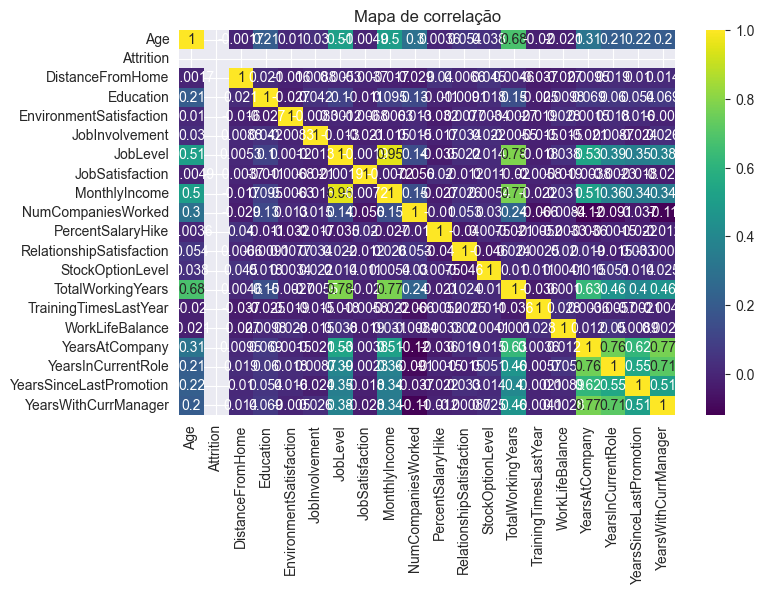

In [28]:
#7. visualização dos dados
#Grafico de  correlação
plt.figure(figsize=(8,5))
numeric_df = df_funcionarios.select_dtypes(['int64','float64', 'bool'])

corr = numeric_df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Mapa de correlação')
plt.show()